# DS for Business Project 2 - Marketing Department

## Introduction:

In every business, an effective Marketing department plays a crucial role in developing the company's growth and sustainability. The department is able to build the company's brand and engage customers leading towards increased sales for greater revenue growth.

The diagram below summarises the key roles of Marketing:

<img src="Description Images/role_of_marketing.jpg" width="350">

Image Ref -> https://courses.lumenlearning.com/wmopen-introbusiness/chapter/the-role-of-customers-in-marketing/

In this project, the goal is to tackle the challenge of launching a __targeted marketing campaign__ and this campaign will be based on 6 months worth of customer data (description below). To do this, marketers are required to understand their customers, their behaviours and drive, so that their needs can be identified. Having developed an understanding of their needs, the marketing campaign can be specifically tailored to each of the individual customer's needs. This should drive up sales for the company's products (may even discover new opportunities). The availability of customer data can provide data scientists the opportunity to perform __Market Segmentation or rather Customer Segmentation__. This means that, based on the customer's behaviour and needs, they can be grouped separately for different marketing purposes, where the main question to be answered is: __How many distinctive groups can be found for the data to streamline the campaign?__


## Breakdown of this Project:
1. Loading in the Dataset.
2. Exploratory Data Analysis (Visualise the data).
3. Examining the Outliers.
4. Dataset preparation (Data cleaning, training and testing splits)
5. Clustering Techniques (K-means, Hiearchical Clustering, DBSCAN)
6. Feature Engineering, Dimension Reduction (PCA, T-SNE, UMAP)
7. Autoencoders
8. Model Comparison and Evaluation.

## Dataset:

Link: https://www.kaggle.com/arjunbhasin2013/ccdata

As quoted from the link, the description is:

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

The following shows the attributes of the Credit Card dataset :

__CUSTID__ : Identification of Credit Card holder (Categorical) \
__BALANCE__ : Balance amount left in their account to make purchases \
__BALANCEFREQUENCY__ : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) \
__PURCHASES__ : Amount of purchases made from account \
__ONEOFFPURCHASES__ : Maximum purchase amount done in one-go \
__INSTALLMENTSPURCHASES__ : Amount of purchase done in installment \
__CASHADVANCE__ : Cash in advance given by the user \
__PURCHASESFREQUENCY__ : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) \
__ONEOFFPURCHASESFREQUENCY__ : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) \
__PURCHASESINSTALLMENTSFREQUENCY__ : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) \
__CASHADVANCEFREQUENCY__ : How frequently the cash in advance being paid \
__CASHADVANCETRX__ : Number of Transactions made with "Cash in Advanced" \
__PURCHASESTRX__ : Numbe of purchase transactions made \
__CREDITLIMIT__ : Limit of Credit Card for user \
__PAYMENTS__ : Amount of Payment done by user \
__MINIMUM_PAYMENTS__ : Minimum amount of payments made by user \
__PRCFULLPAYMENT__ : Percent of full payment paid by user \
__TENURE__ : Tenure of credit card service for user 

## Requirements:
- Numpy
- Pandas
- Seaborn
- Matplotlib
- scikit-learn (sklearn)
- os
- tensorflow (or Keras)

## 1 - Setting up the Libraries:

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2 - Load in the Dataset:


In [2]:
# Dataset Filename:
dataset_fileName = 'Marketing_data.csv'

# Set up the Working Directory:
currentDirectory = os.getcwd()
path_to_dataset = currentDirectory + '/Dataset/' + dataset_fileName

In [3]:
# Load in the File: .csv format
marketing_data_df = pd.read_csv(path_to_dataset)

### 2.1 - First glance at the dataset:

Taking a look at the first 10 rows of the dataset.

In [4]:
marketing_data_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### 2.2 - Dataset Statistics:

Take a look at the general statistics of this dataset.


In [5]:
marketing_data_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### 2.3 - Dataset Column Description:

In [6]:
marketing_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

It can be seen that majority of all the columns are in numerical format (float or int).

### 2.4 - Inspect the unique values in each column:

In [7]:
marketing_data_df[marketing_data_df.columns].nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

## 3 - Exploratory Data Analysis (EDA):

### 3.1 - Check for any missing data samples:

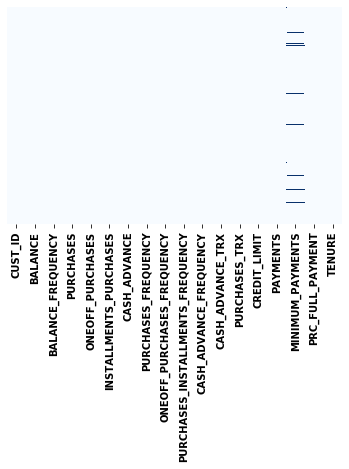

In [8]:
sns.heatmap(data=marketing_data_df.isnull(), yticklabels=False, cbar=False, cmap = "Blues")

From the output chart above, it can be seen that the column "MINIMUM_PAYMENTS" do have missing values.

#### Let's inspect this column further:

In [9]:
marketing_data_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

There are 313 missing "MINIMUM_PAYMENTS" data samples. Interestingly, the column "CREDIT_LIMIT" also have one missing value.

#### Take a look at the statistics for these columns:

This can be used to form a strategy to impute these missing data samples.

In [10]:
marketing_data_df['MINIMUM_PAYMENTS'].describe(), marketing_data_df['CREDIT_LIMIT'].describe()

(count     8637.000000
 mean       864.206542
 std       2372.446607
 min          0.019163
 25%        169.123707
 50%        312.343947
 75%        825.485459
 max      76406.207520
 Name: MINIMUM_PAYMENTS, dtype: float64,
 count     8949.000000
 mean      4494.449450
 std       3638.815725
 min         50.000000
 25%       1600.000000
 50%       3000.000000
 75%       6500.000000
 max      30000.000000
 Name: CREDIT_LIMIT, dtype: float64)

From the statistics above, it makes sense to use to the "mean"" values from each column to impute the missing data with. This will be implemented later on in the Data Cleaning Section.

### 3.2 - Check for duplicate data samples:

In [11]:
marketing_data_df.duplicated().sum()

0

From this quick check, it seems like this dataset does not have any duplicates.

### 3.3 - Correlations of the Feature Columns:

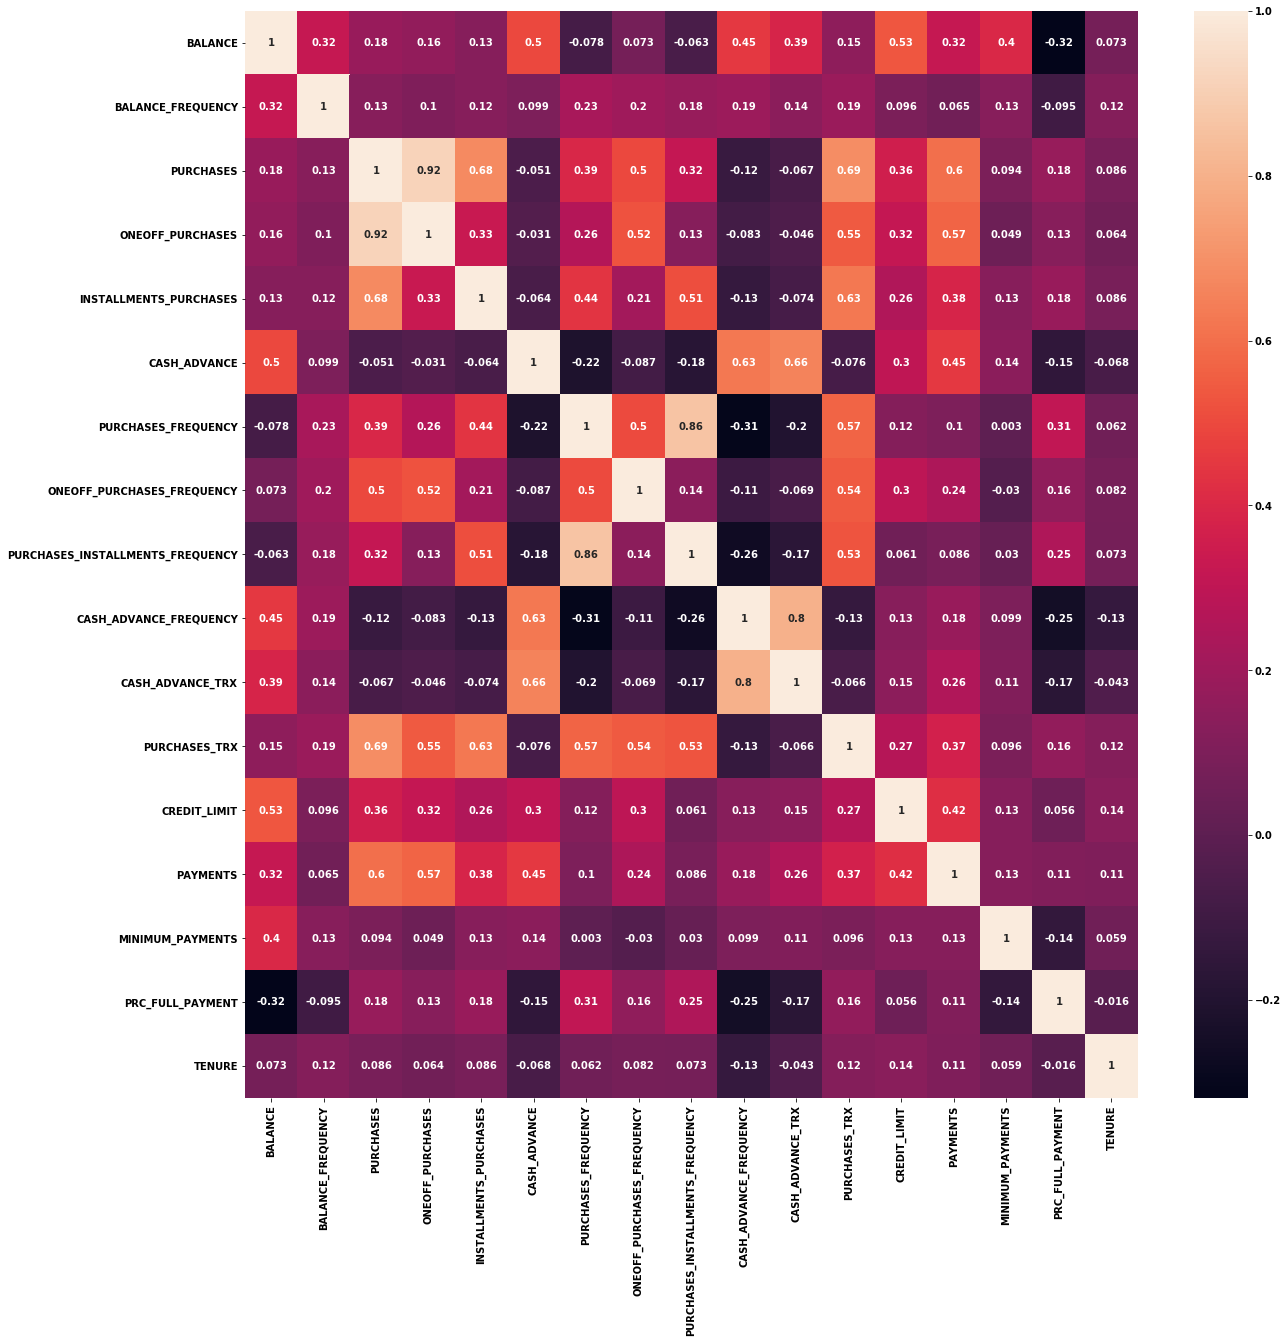

In [12]:
# Instantiate a correlation matrix for plotting:
correlations_marketing = marketing_data_df.corr()

# Plot with HeatMap:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data=correlations_marketing, annot=True)

### Observation:

From the heatmap key on the right, it shows the lighter the heatmap colour, the better correlated the features are to each other.

Observed outcomes examples:
- There is a strong correlation between the CASH_ADVANCE, CREDIT_LIMIT and BALANCE.
- There is a strong correlation between OENOFF_PURCHASES, INSTALLMENT_PURCHASES, PURCHASE_TRX and BALANCE.
- There is a good correlation between PAYMENTS and PURCHASES_TRX or CREDIT_LIMIT.
- There is a strong correlation between CASH_ADVANCE_TRX and CASH_ADVANCE.
- There is a good correlation between CASH_ADVANCE_FREQUENCY and BALANCE.

### 3.4 - Kernel Density Plot (KDE) Plot:

KDE visualises the probability density of a continuous variable, where it demonstrates the probability density at different values of the continuous variable.

__Note__: For majority of the EDA visualisations, the "CUST_ID" column was temporarily removed.

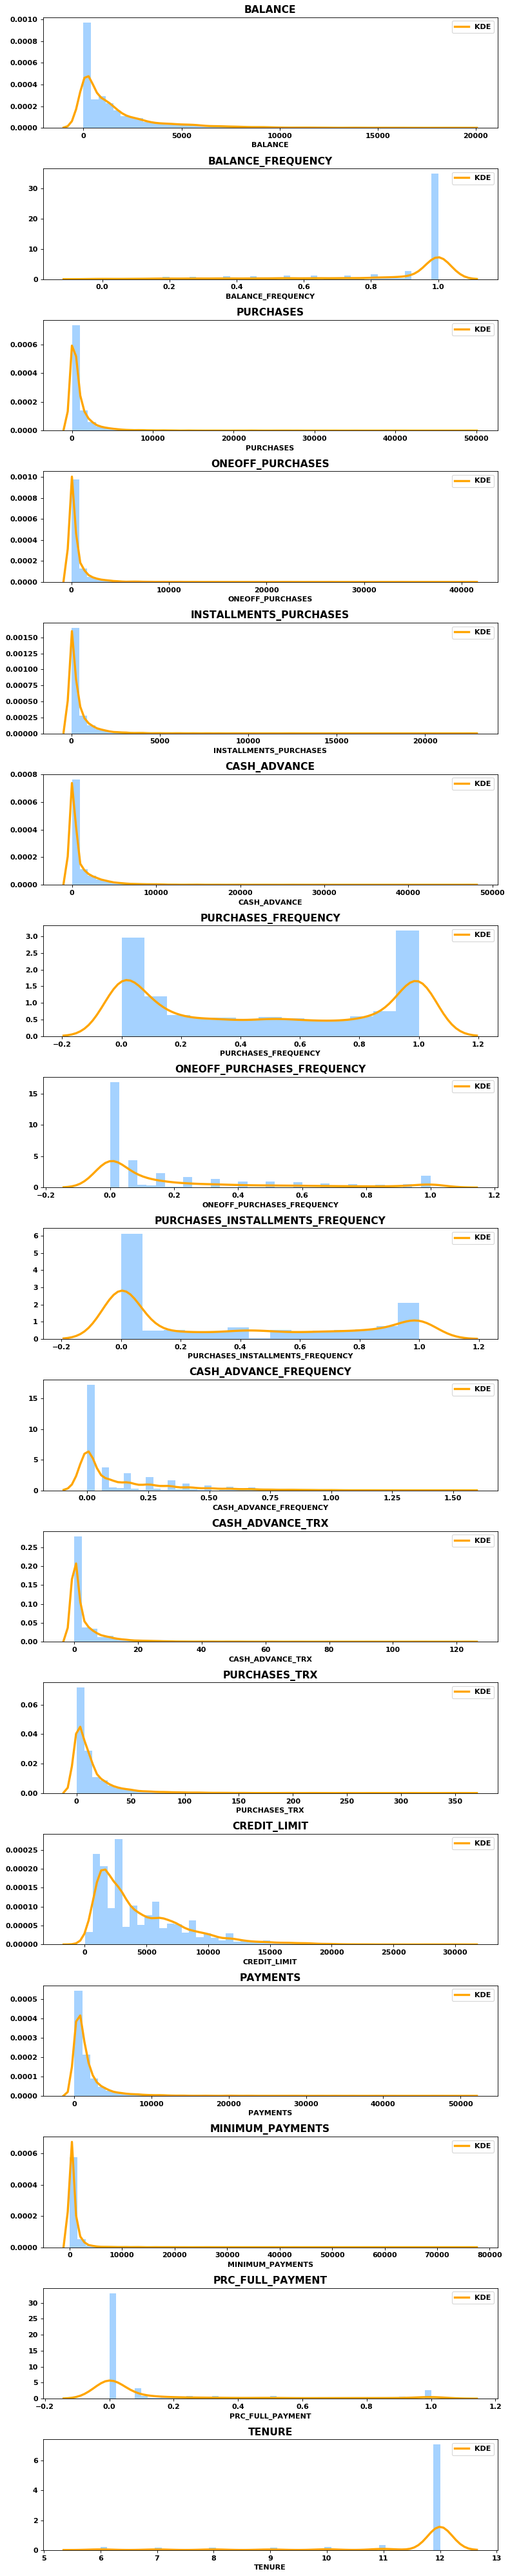

In [13]:
# Prepare data:
df_for_plot = marketing_data_df.drop(columns="CUST_ID")

# Draw Plot:
plt.figure(figsize=(10, 50), dpi= 80)

for i in range(len(df_for_plot.columns)):
    plt.subplot(len(df_for_plot.columns), 1, i+1)
    
    sns.distplot(a=df_for_plot[df_for_plot.columns[i]], 
                 kde_kws={'color':'orange', 'linewidth':3, 'label':'KDE'}, 
                 hist_kws={'color':'dodgerblue'}
                )
    
    # Plot Decoration:
    plt.title(label=df_for_plot.columns[i], fontsize=14)
    plt.legend()

plt.tight_layout()

### Observations:

Taking a look at a few of the plots and describing them, it follows as,
- For BALANCE plot: Majority of the customers have roughly USD1,500 in their accounts, while some people in the extremes have about USD20,000
- For BALANCE_FREQUENCY plot: Almost all of the people can be seen to use their credit cards frequently (value of 1). This leads to the frequent updates to their balance that is associate with the card usage.
- For PURCHASES plot: Majority of the purchase value is around US1,000 to USD1,500.
- For PURCHASE_FREQUENCY plot: There are 2 groups of customers, where one group does not use their credit cards for purchases and the othehr group do use it. 
- For CASH_ADVANCE_FREQUENCY plot: Majority of the customers fo not use Cash Advances, this indicates that they understand the penalty associated with withdrawing cash out of thhe credit card.
- For PRC_FULL_PAYMENT plot: It seems like majority of the customer prefer partial payments rather than in full payments.
- For TENURE plot: There are more customers that are loyal to the bank at around 12 years.

### 3.5 - Plot the Columns with "Frequency" in them:





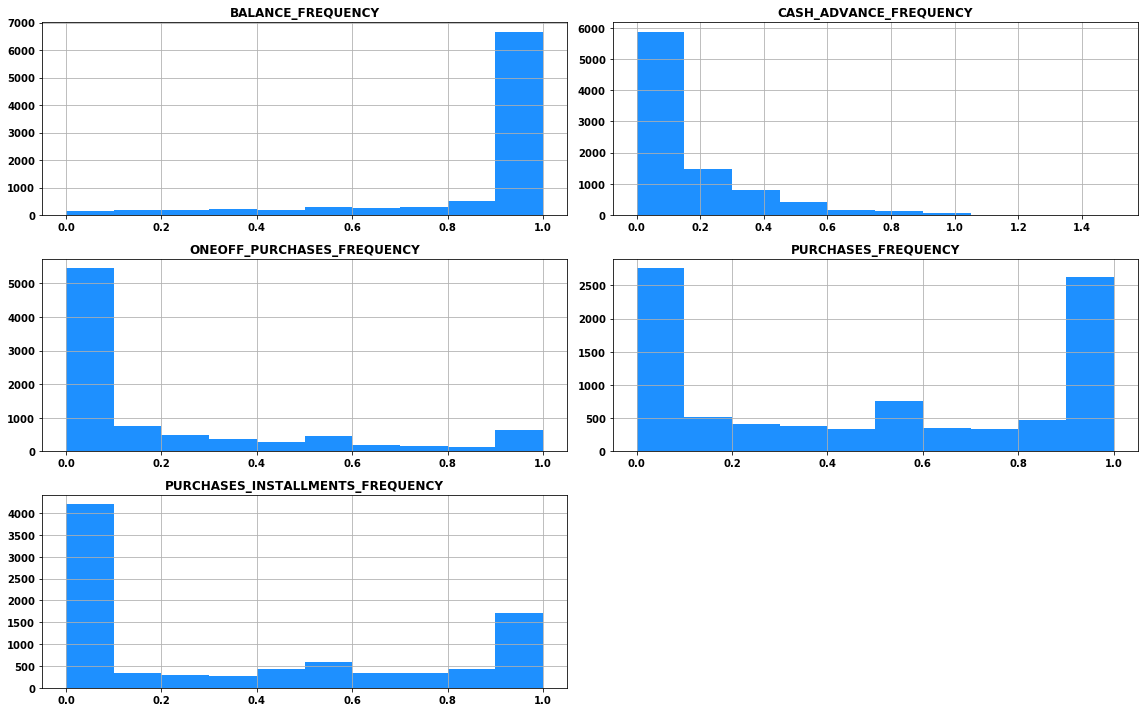

In [14]:
# Filter:
condition_frequency = [x for x in df_for_plot.columns if 'FREQUENCY' in x]

# Prepare the data:
df_for_plot[condition_frequency].hist(figsize=(16,10), color='dodgerblue')
plt.tight_layout()

### 3.6 - Inspect the Outliers in the columns:



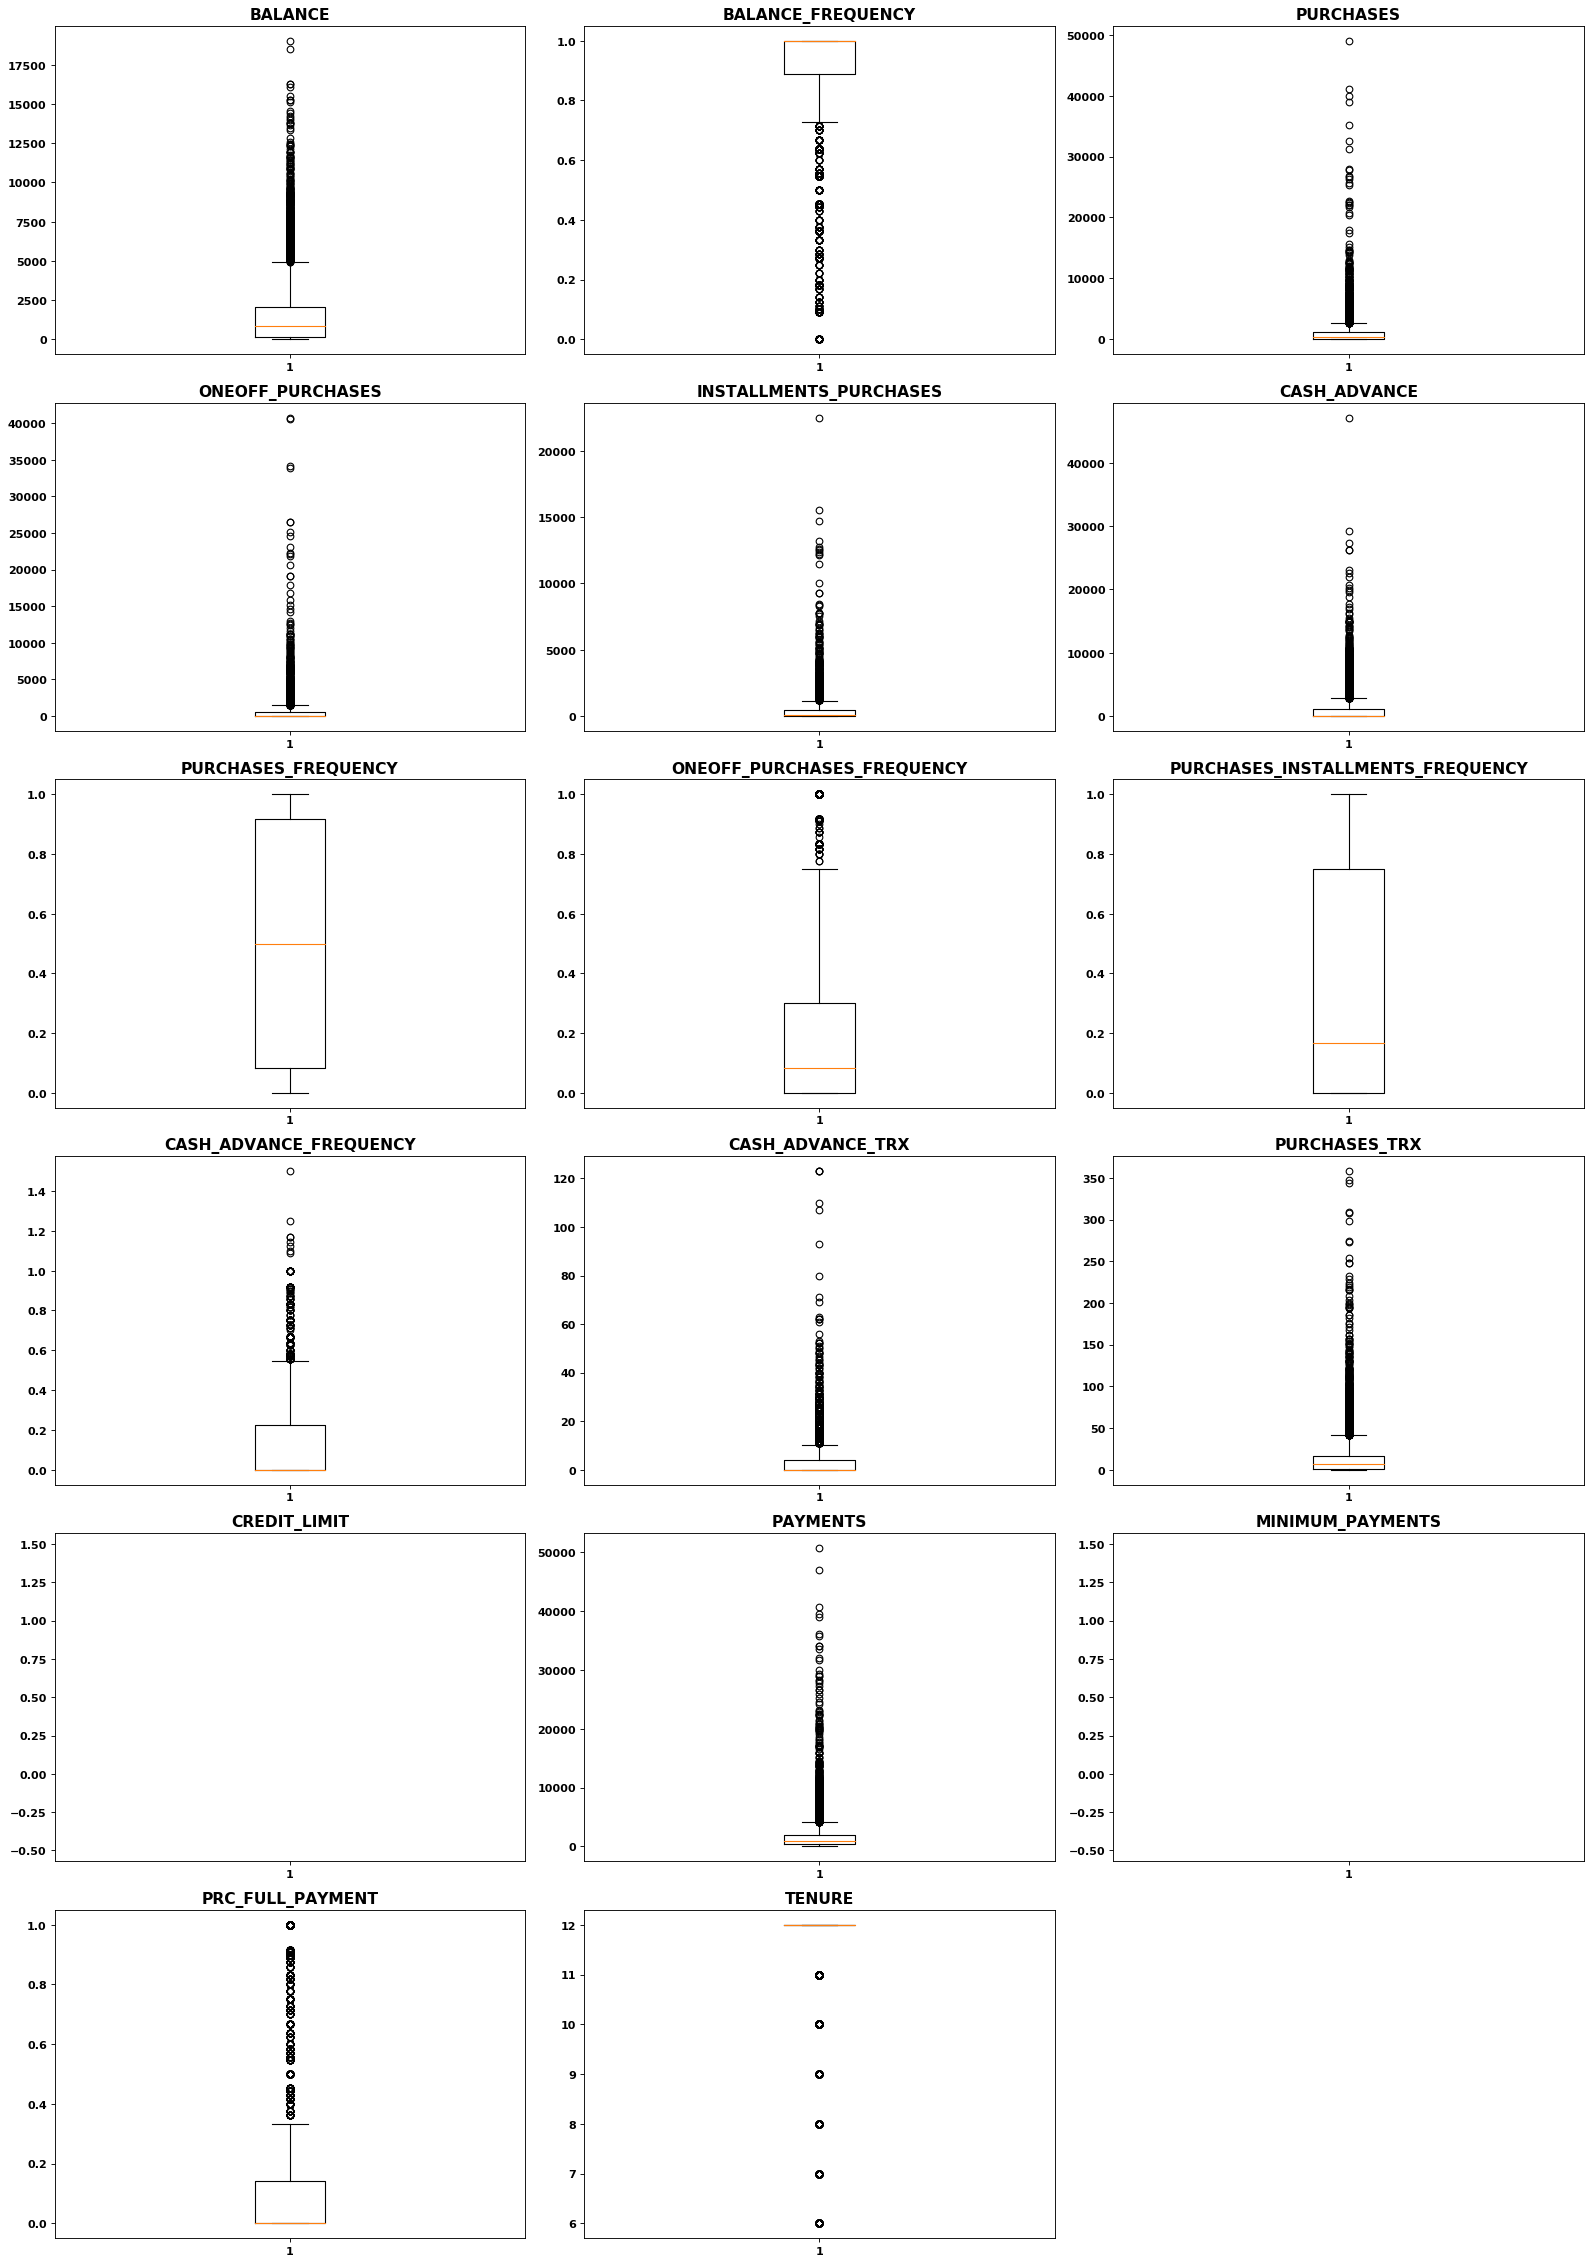

In [15]:
# Draw Plot
plt.figure(figsize=(20, 80), dpi= 80)

for i in range(len(df_for_plot.columns)):
    plt.subplot(len(df_for_plot.columns), 3, i+1)
    plt.boxplot(df_for_plot[df_for_plot.columns[i]])
    
    # Plot Decoration:
    plt.title(label=df_for_plot.columns[i], fontsize=14)

plt.tight_layout()

It is evident that from the boxplots that most of the columns do have outliers. Actions on these will be considered later on in this project, preferably after some preliminary clustering. 

Therefore for now, these outliers are left alone.

## 4 - Data Cleaning:

In this section, the dataset will also go through the data cleaning process. Just to recap, this is where the data is prepared for analysis, by removing/modifying data (individual samples, rows or entire columns) that are incorrect, incomplete, irrelevent, duplicated or poorly formatted. This will ensure that the data which remains can be used to build a better model with greater predictive power. (In other words, to maximize a dataset’s accuracy without necessarily deleting information.)

The following diagram outlines the process for Data Cleaning:

<img src="Description Images/data_cleaning_cycle.jpg" width="550">

Image Ref -> https://www.iteratorshq.com/blog/data-cleaning-in-5-easy-steps/

The work done in this section will follow the steps outline above as much as possible, as different datasets will involve a varying degree of cleaning. The end goal of this section would be to define what will be needed so that a Pipeline can be designed to process the data for the modeling task, as well as exploring the characteristics of the dataset.



### 4.1 - Different Types of Data:

The following is a chart that defines the Types of Data to deal with:

<img src="Description Images/data-types-in-statistics.png" width="550">

Image Ref -> https://www.mymarketresearchmethods.com/data-types-in-statistics/

__Categorical values are split into Two types__: Nominal or Ordinal.

Nominal values -> Nominal scales are ttypically used for labeling data/variables that does not have any "quantitative" value. For example, gender, hair colour etc. Note that all of these are scales are mutually exclusive (non-overlapping) and consists of no numerical significance.

Ordinal values -> Ordinal scales do show that the ordering of these values have a significance, and that the differences between each value is not really known. For example, 4 is bettter than 3, and 3 is better than 2 and so on, but here you can't quantify how much better it is to each other. Another example, is the difference between “OK” and “Unhappy” the same as the difference between “Very Happy” and “Happy?”, it can be seen that it is not possible to tell the difference. Ordinal scales are measures of non-numeric concepts like satisfaction, happiness, discomfort, etc. Futher, the best way to determine the central tendency of a set of ordinal data values is use Mode or Median, but not the Mean.

__Numerical values are split into Two types__: Discrete or Continuous. \
Additionally, __Continuous variables__ are further split into two types: Intervals and Ratios.

Intervals -> Interval scales are numeric scales that shows the order and exact differences between its values. For example, the Celsis temperature have differences between each value and this difference is always the same. 
The central tendency can be measured by mode, median, or mean. The standard deviation can also be calculated.

Ratios -> Ratio scales are numeric scales that shows the order, its exact value between units and (unlike intervals) have an absolute zero. This allows for a wide range of descriptive and inferential statistics to be applied. These variables can be meaningfully added, subtracted, multiplied, divided (ratios). Central tendency can be measured by mode, median, or mean. The measures of dispersion, such as standard deviation and coefficient of variation can also be calculated from ratio scales. For example, these can be height and weight.

Source: https://www.mymarketresearchmethods.com/data-types-in-statistics/

### Note: In the following sections, the Dataset will be coppied and the data cleaning will be implemented to test on this dataFrame_copy. The actual transformations will be implemented later on in a Pipeline sequence.

### 4.2 - Dealing with the Missing Values:

This section will deal with the missing values that was found previously, where the columns found were "CREDIT_LIMIT" and "MINIMUM_PAYMENTS".

In [16]:
# Import the required library:
from sklearn.base import TransformerMixin

In [17]:
class CustomImputer(TransformerMixin):
    """ This builds the CustomImputer, that inherits the TransformerMixin class.
        It essentially imputes the missing values within the listed columns.
        The Strategy can be 
        The inheritance should have a .fit_transform method to call with .fit and .transform methods.
    Parameters:
        - col, is the list of columns to impute.
        - impute_strategy, is the impute strategy (choose between 'mean' or 'median').
        - print_log, is an Optional Flag to print out the log to check that thee values were imputed.
    Returns:
        - returns the Inputed Dataframe.
    """
    # Initialise the instance attributes:
    def __init__(self, col, impute_strategy, print_log=False):
        self.col = col
        self.impute_strategy = impute_strategy
        self.print_log = print_log
        
    # Transform the dataset:
    def transform(self, dataFrame):
        X = dataFrame.copy()
        
        # Impute the values:
        if self.impute_strategy == 'mean':
            X[self.col] = X[self.col].fillna( X[self.col].mean() )
        else:
            X[self.col] = X[self.col].fillna( X[self.col].median() )
            
        # Perform a quick check:
        if self.print_log == True:
            print(X.isnull().sum())
            print("Checking DataFrame and there should be -- no missing values --.")
            print(" ")
                              
        return X
        
    # Fit method, that follows the fit method from scikit-learn:
    def fit(self, *_):
        return self

In [18]:
# list the columns to impute:
columns_to_impute = ['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']

# Apply the custom encoder for Ordinal columns, instantiate:
cc_impute_columns = CustomImputer(col=columns_to_impute, impute_strategy='mean', print_log=True)

# Fit and transform on the dataset:
marketing_data_df_copy = cc_impute_columns.fit_transform(X=marketing_data_df)
marketing_data_df_copy

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64
Checking DataFrame and there should be -- no missing values --.
 


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


All good. It seems like all of the missing values were dealt with.

### 4.3 -  Drop columns (features) that are not informative:

During the examination of the columns (features) of this dataset, the following columns were found to be uninformative:
- CUST_ID 

In [19]:
class CustomDropUnwantedColumns(TransformerMixin):
    """ This builds the CustomDropUnwantedColumns, that inherits the TransformerMixin class.
        It essentially removes the listed unwanted columns.
        The inheritance should have a .fit_transform method to call with .fit and .transform methods.
    Parameters:
        - col, is the list of columns to impute.
    Returns:
        - returns the transformed dataframe.
    """
    # Initialise the instance attributes, the columns:
    def __init__(self, col):
        self.col = col

    # Transform the dataset by dropping irrelevant columns:
    def transform(self, dataFrame):
        X = dataFrame.copy()
        
        X_dropped = X.drop(labels=columns_to_drop, axis=1)
        
        return X_dropped
    
    # Fit method, that follows the fit method from scikit-learn:
    def fit(self, *_):
        return self

In [20]:
# list the columns to drop:
columns_to_drop = ['CUST_ID']

# Apply the custom encoder for Ordinal columns, instantiate:
cc_drop_columns = CustomDropUnwantedColumns(col=columns_to_drop)

# Fit and transform on the dataset:
marketing_data_df_copy = cc_drop_columns.fit_transform(X=marketing_data_df_copy)
marketing_data_df_copy.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

As it can be seen, the unwanted column ("CUST_ID") have been removed.

### 4.4 - Encoding the Categorical Features:

Previously, it was established that there all of the columns are numerical (float and int), therefore there won't be any categorical columns found here to encode.

In [22]:
def search_categorical_variables(dataset, print_logs=False):
    ''' This function will search through the Dataset and determine which
        column is a categorical one or a numerical one.
    Parameters:
        - dataset, is the input dataset to search through.
        - print_logs, is an Optional Flag to print out the logs, where here 
            it is the list of columns found.
    Returns:
        - returns lists_categorical_columns_found, lists_numerical_columns_found.
    '''
    lists_categorical_columns_found = []
    lists_numerical_columns_found = []

    for col in dataset.columns:
        for unique_row_value in dataset[col].unique():
            current_col_categorical = None

            if isinstance(unique_row_value, str):
                current_col_categorical = True
            else:
                ## Set as Numerical type:
                current_col_categorical = False

        # At the end of column check: Update list with the column name.
        if current_col_categorical:
            lists_categorical_columns_found.append(col)
        else:
            lists_numerical_columns_found.append(col)
    
    if print_logs == True:
        # Shows the Categorical Columns found:
        print('Categorical Columns found are:\t {}'.format(lists_categorical_columns_found))
        print('\t')

        # Shows the Numerical Columns found:
        print('Numerical Columns found are:\t {}'.format(lists_numerical_columns_found))
    else:
        pass
    
    return lists_categorical_columns_found, lists_numerical_columns_found

In [24]:
# Apply the function above:
lists_categorical_columns_found, lists_numerical_columns_found = search_categorical_variables(dataset=marketing_data_df_copy,
                                                                                             print_logs=True)


Categorical Columns found are:	 []
	
Numerical Columns found are:	 ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


The above lists confirms it, there are no categorical columns to encode at this point.

### 4.5 - Scaling the Feature Columns:

The function here will scale and convert it back to DataFrame. The typical MinMaxScaler() from sklearn outputs np.array.

##### NOTE: This step can be skipped, as sklearn models is not compatible when the column headers are present with the training (or testing) dataset, meaning when it is a DataFrame. The training set will still be scaled with MinMaxScaler() to output Numpy Arrays.

Below shows a demonstration of the output DataFrame that was scaled.

In [25]:
# Import the required Library:
from sklearn.preprocessing import MinMaxScaler

In [26]:
class scale_features_dataFrame(TransformerMixin):
    """ This builds the Custom Scaler for the dataset, that inherits the TransformerMixin class.
        The inheritance should have a .fit_transform method to call with .fit and .transform methods.
    Parameters:
        - dataFrame, is the input Dataset (DataFrame)
    Returns:
        - returns the Scaled DataFrame (rather than np.array).
    """
    # Initialise the instance attributes, the columns and ordering:
    def __init__(self):
        pass        
    
    # Transform the dataset's ordinal values:
    def transform(self, dataFrame):
        X = dataFrame.copy()
        scaler = MinMaxScaler()
        
        # Scale the data:
        X_array = scaler.fit_transform(X)
        
        # Convert back to DataFrame:
        X_df = pd.DataFrame(X_array, 
                            index=X.index, 
                            columns=X.columns)
               
        return X_df
    
    # Fit method, that follows the fit method from scikit-learn:
    def fit(self, *_):
        return self
    

In [27]:
# Instantiate teh Scaler:
scaler = scale_features_dataFrame()

# Fit and Transform the data:
marketing_data_df_copy = scaler.fit_transform(X=marketing_data_df_copy)

# Inspect:
marketing_data_df_copy

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.000000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.011310,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.001496,1.000000,0.005936,0.000000,0.012939,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.006419,0.000640,0.500000,0.0
8946,0.001007,1.000000,0.006118,0.000000,0.013333,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.005439,0.011310,0.000000,0.0
8947,0.001229,0.833333,0.002945,0.000000,0.006418,0.000000,0.833333,0.000000,0.666667,0.000000,0.00000,0.013966,0.031720,0.001602,0.001078,0.250000,0.0
8948,0.000707,0.833333,0.000000,0.000000,0.000000,0.000776,0.000000,0.000000,0.000000,0.111111,0.01626,0.000000,0.015025,0.001036,0.000729,0.250000,0.0


## 5 - Design the Pre-processing Pipeline:

Here, the pre-processing steps defined above will be set up in a pipeline to process and transform the dataset to be ready for the following stages such as clustering and autoencoder modeling.

In [ ]:
# ==============================================================================
# 1. Drop the unwanted columns.
# ==============================================================================
# list the columns to drop:
columns_to_drop = ['CUST_ID']

# Apply the custom encoder for Ordinal columns, instantiate:
cc_drop_columns = CustomDropUnwantedColumns(col=columns_to_drop)

# ==============================================================================
# 2. Scale the features in the dataset:
# ==============================================================================
# scaler = scale_features_dataFrame()
scaler = MinMaxScaler()


### Transform the dataset with the Pipeline:

In [28]:
# Import the required library:
from sklearn.pipeline import Pipeline

In [ ]:
break

In [ ]:
# Define the Pipeline Sequence:
pipe_preprocessing = Pipeline(steps=[("drop_columns", cc_drop_columns),
                                     ("scaler", scaler)]
                             )

# Fit the Pipeline to the Dataset:
pipe_preprocessing.fit(marketing_data_df)

# Transform the Dataset:
marketing_processed_df = pipe_preprocessing.transform(marketing_data_df)
x_marketing_features = marketing_processed_df

# Inspect:
x_marketing_features

In [21]:
break

SyntaxError: 'break' outside loop (<ipython-input-21-6aaf1f276005>, line 4)

In [ ]:
<img src="Description Images/.png" width="750">

Image Ref -> 